# 6A. Check for the Autocorrelation Function and Partial Autocorrelation Function of the data

**Aim**: Understand autocorrelation, Partial Autocorrelation Function, ARMA, and apply these techniques in projects.

Autocorrelation Informally, is the similarity between observations as a function of the time lag between them.

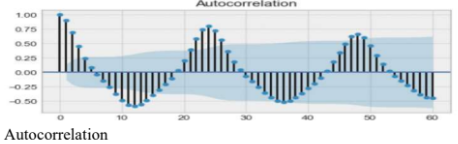

**ACF (Auto Correlation Function)**

_Auto Correlation function takes into consideration of all the past observations irrespective of its effect on the future or present time period_. It calculates the correlation
between the t and (t-k) time period. It includes all the lags or intervals between t and (t-k)
time periods. Correlation is always calculated using the **Pearson Correlation formula**.

**PACF(Partial Correlation Function)**

_The PACF determines the partial correlation between time period t and t-k. It doesn’t take into consideration all the time lags between t and t-k_. For e.g. let's assume that
today's stock price may be dependent on 3 days prior stock price but it might not take into consideration yesterday's stock price closure. Hence we consider only the time lags having a direct impact on future time period by neglecting the insignificant time lags in between the two-time slots t and t-k.

**AR (Auto-Regressive) Model**

The time period at t is impacted by the observation at various slots t-1, t-2, t-3, ....., t-k.

The **impact of previous time spots is decided by the coefficient factor at that particular
period of time**. The price of a share of any particular company X may depend on all the
previous share prices in the time series. This kind of model calculates the regression of
past time series and calculates the present or future values in the series in know as **Auto Regression (AR) model**.

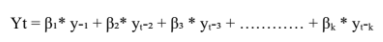

**MA (Moving Average) Model**

The time period at t is impacted by the **unexpected external factors** at various slots t-1, t-2, t-3, ....., t-k. These unexpected impacts are **known as Errors or Residuals**. 

The impact of previous time spots is decided by the coefficient factor α at that particular period of time. The price of a share of any particular company X may depend on some company merger that happened overnight or maybe the company resulted in shutdown due to
bankruptcy. **This kind of model calculates the residuals or errors of past time series and calculates the present or future values in the series in know as Moving Average (MA) model.**



**ARMA (Auto Regressive Moving Average) Model**

This is a model that is combined from the AR and MA models. In this model, the impact of previous lags along with the residuals is considered for forecasting the future values of the time series. Here β represents the coefficients of the AR model and α represents the coefficients of the MA model.

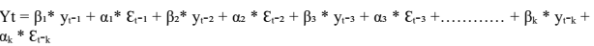

_We know that in order to apply the various models we must in the beginning convert the series into Stationary Time Series. So, apply the differencing or Integrated method where the t-1 value is subtracting from t values of time series. After applying the first differencing if we are still unable to get the Stationary time series then, again apply the second-order differencing._

**Aim**
- To plot and review the partial autocorrelation function for a time series.
- To find the difference between autocorrelation and partial autocorrelation functions for time series analysis.

**Dataset – Minimum Daily Temperatures Dataset**

- This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia. The units are in degrees Celsius and there are 3,650 observations. [Source: Australian Bureau of Meteorology].

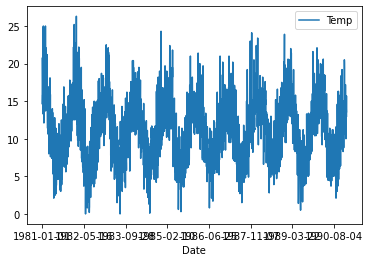

In [1]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
series.plot()
pyplot.show()

 # Correlation and Autocorrelation

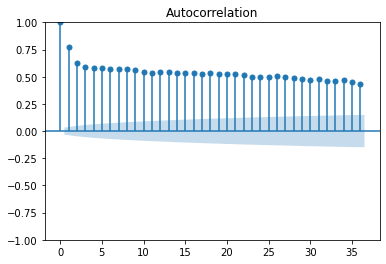

In [2]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
plot_acf(series)
pyplot.show()

# Partial Autocorrelation Function

_A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening
observations removed_. 

The partial autocorrelation at lag k is the correlation that results
after removing the effect of any correlations due to the terms at shorter lags.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the **direct correlation and indirect correlations**. _These indirect correlations are a linear function of the correlation of the observation, with observations
at intervening time steps_. It is these indirect correlations that the partial autocorrelation
function seeks to remove. This is the intuition for the **partial autocorrelation**.

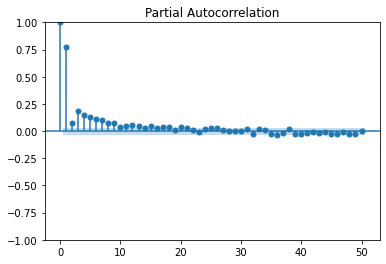

In [3]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
plot_pacf(series, lags=50)
pyplot.show()

# Calculating Autocorrelation and Partial Autocorrelation

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat
import matplotlib.pyplot as plt
# settings
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16, 8)
%config InlineBackend.figure_format = "retina"

# Importing dataset and plot

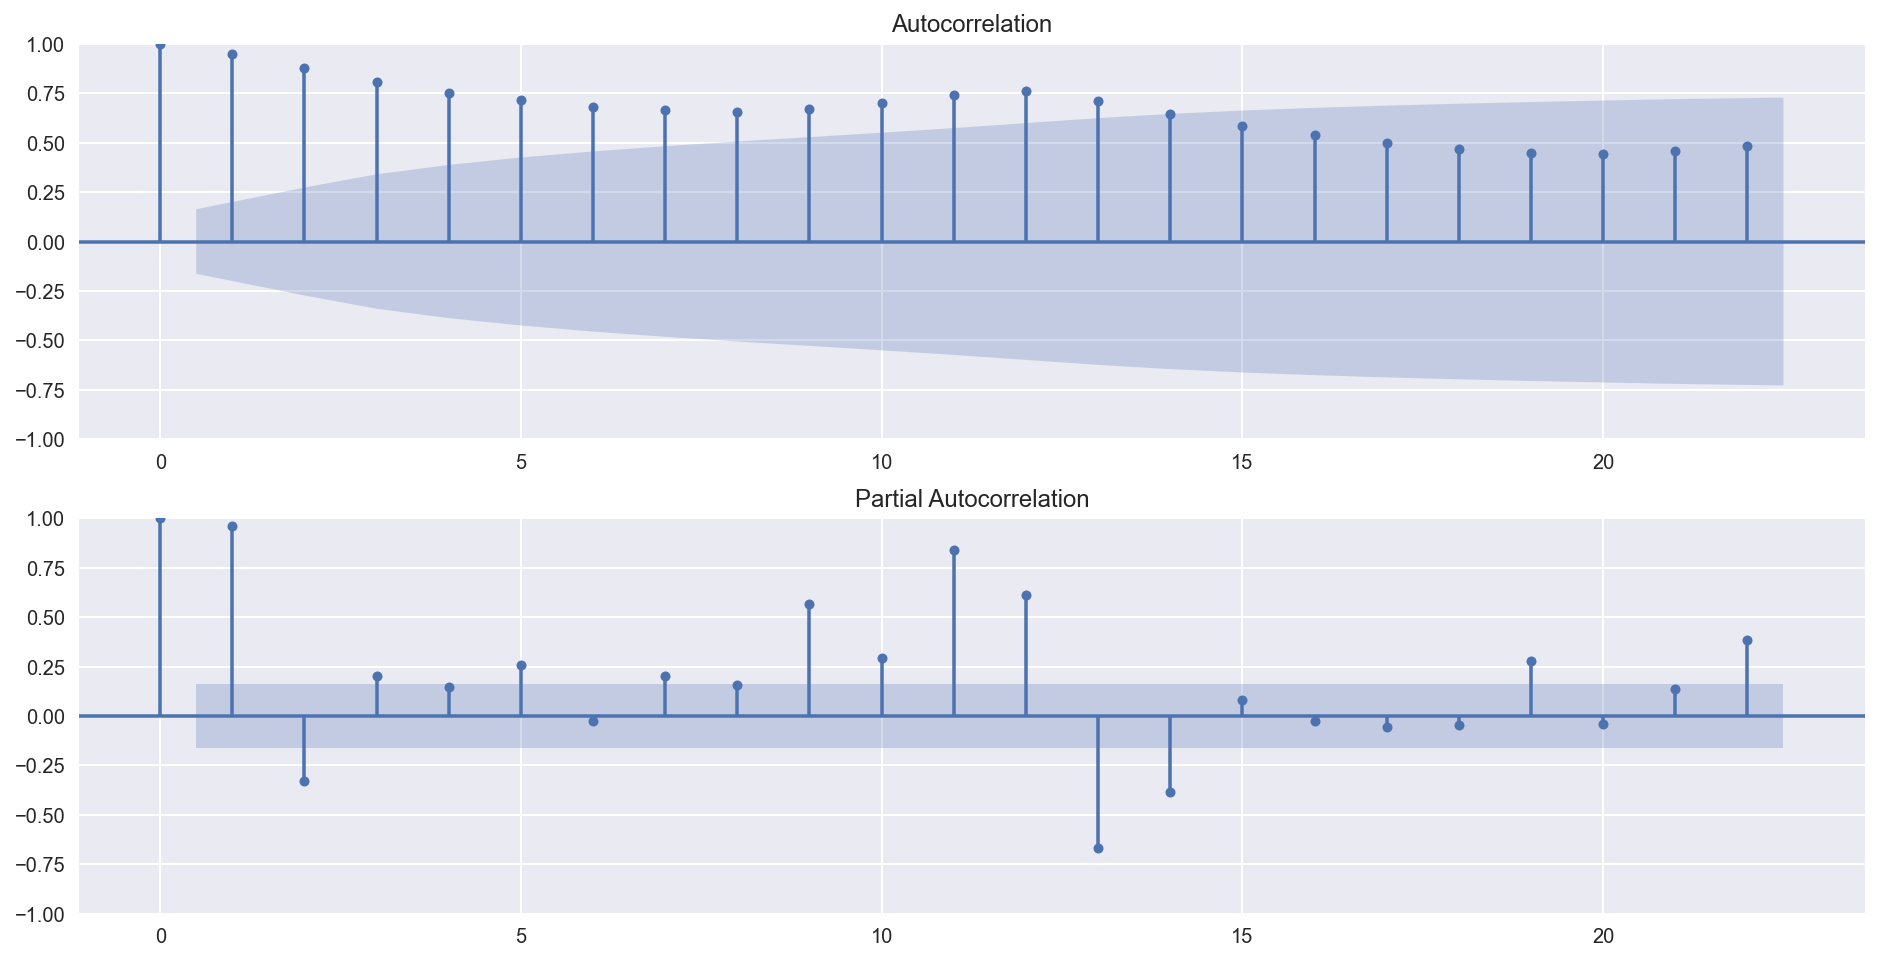

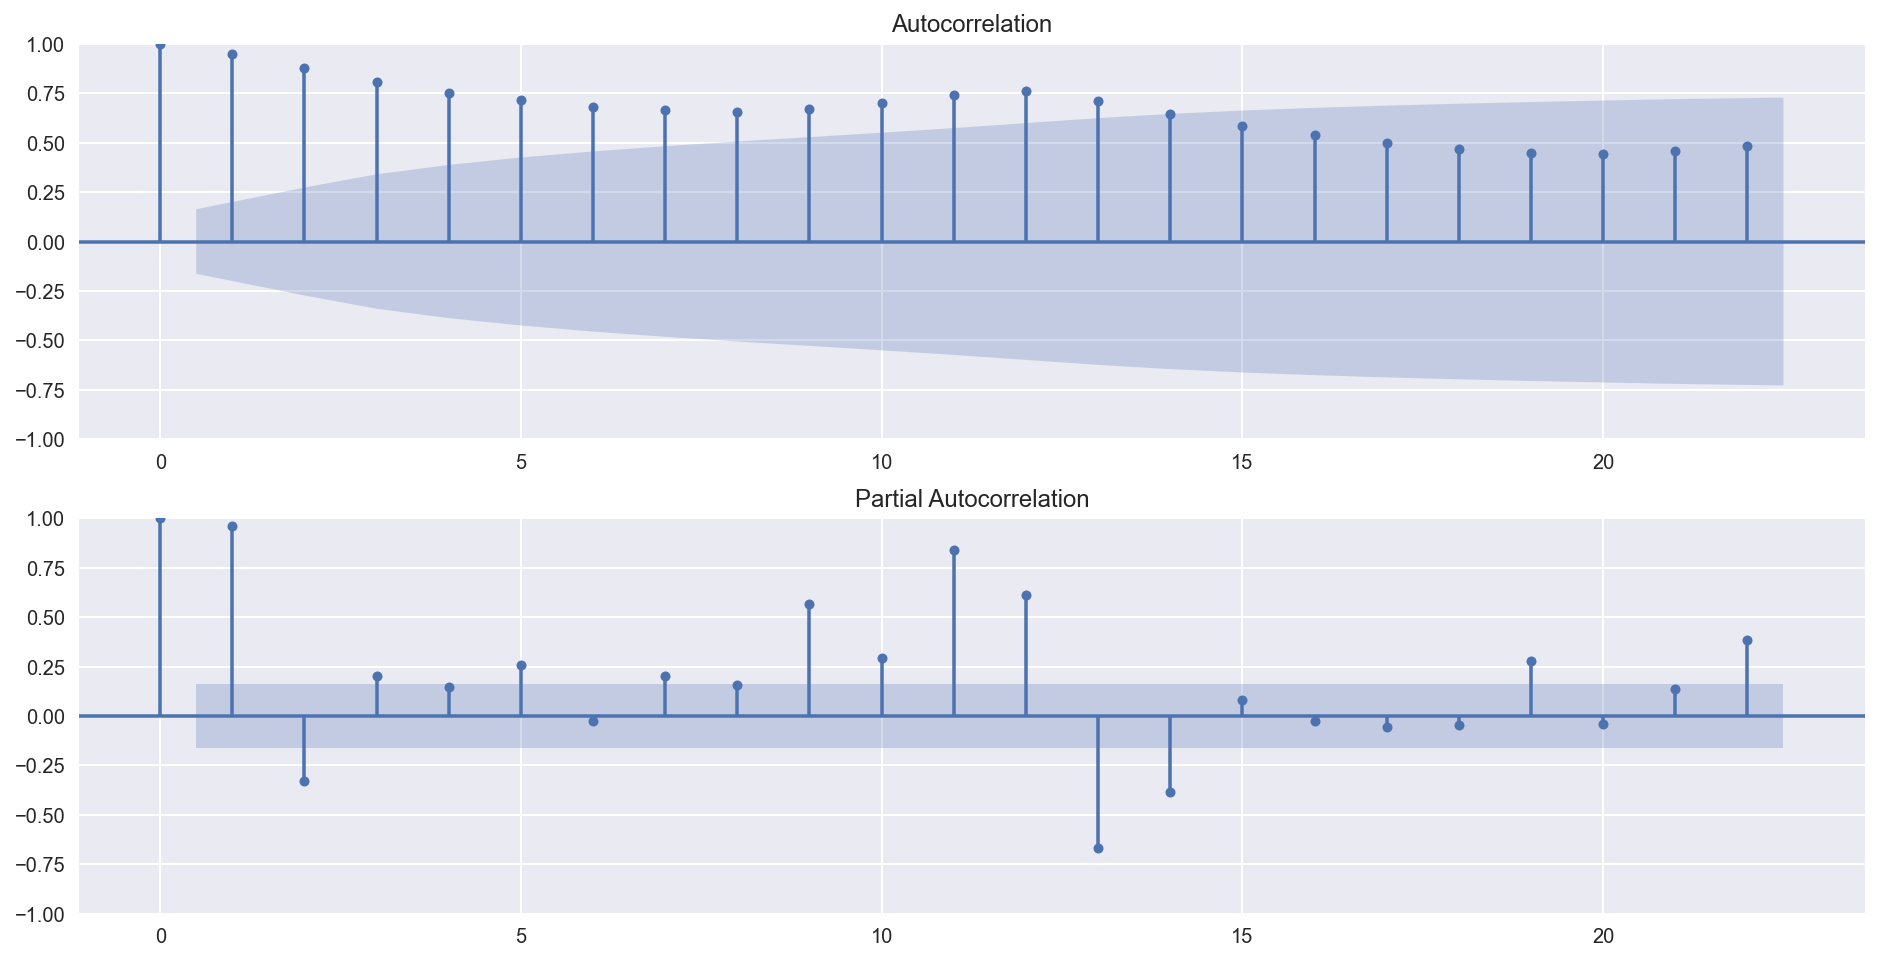

In [5]:
df = pd.read_csv("airline-passengers.csv", index_col=0)
df.index = pd.to_datetime(df.index)
y = df["Passengers"]
y

fig, ax = plt.subplots(2, 1)
plot_acf(df, ax=ax[0])
plot_pacf(df, ax=ax[1], method="ols")

**Autocorrelation Function (ACF)**

In [6]:
acf(y, nlags=10)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

# Replicating it

In [7]:
# benchmark
acf(y, nlags=10)
# replicating the acf function
acf_list = []
mu = y.mean()
for lag in range(0, 11):
    acf_list.append(np.dot((y - mu).iloc[lag:], (y.shift(lag) - mu).iloc[lag:]) / sum((y - mu)** 2))
np.array(acf_list)
# alternative way to write the same using sum instead of the dot product
acf_list = []
mu = y.mean()
for lag in range(0, 11):
    acf_list.append(sum((y - mu).iloc[lag:] * (y.shift(lag) - mu).iloc[lag:]) / sum((y - mu)** 2))
np.array(acf_list)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

# Partial Autocorrelation Function (PACF)

In [8]:
pacf(df, nlags=10, method="ols")
N_LAGS = 10
# the first partial autocorrelation is always equal to 1
pacf_list = [1]
X = pd.DataFrame(lagmat(y, N_LAGS))
X.columns = [f"lag_{lag+1}" for lag in range(10)]
for k in range(1, N_LAGS + 1):
    fitted_model = LinearRegression().fit(X.iloc[k:, :k],y.iloc[k:])
    pacf_list.append(fitted_model.coef_[-1])
np.array(pacf_list)

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358])

Below you can see how the PACF values change when including more lags using the inefficient method

In [9]:
pacf(y, 2, method="ols-inefficient")

array([ 1.        ,  0.95868964, -0.33258806])

In [10]:
pacf(y, 4, method="ols-inefficient")

array([ 1.        ,  0.95860315, -0.33427195,  0.1970437 ,  0.13909745])

For comparison's sake, we run the same two calls to the pacf function using the efficient method.

In [11]:
pacf(y, 2, method="ols")

array([ 1.        ,  0.95893198, -0.32983096])

In [12]:
pacf(y, 4, method="ols")

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798])

# Autocorrelation

In [13]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.33255144]


# Moving Average

In [14]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[70.90071956]


C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


# Autoregressive Moving Average (ARMA)

In [15]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[0.50984503]


# Autoregressive Integrated Moving Average (ARIMA)

In [16]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[100.85733426]


C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


# Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [17]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.75505008]


# Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

In [30]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

# contrived dataset
data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]

# fit model
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# make prediction
exog2 = [200 + random()]
yhat = model_fit.forecast(steps=1, exog=[exog2])
print(yhat)


[100.94702892]


# Simple Exponential Smoothing (SES)

In [19]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.5137712]


# Holt Winter’s Exponential Smoothing (HWES)

In [20]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.56846059]


# Vector Autoregression (VAR)

In [29]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

# contrived dataset with dependency
data = []
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)

# fit model
model = VAR(data)
model_fit = model.fit()

# make prediction
yhat = model_fit.forecast(model_fit.endog, steps=1)
print(yhat)


[[100.00328175 100.40508675]]


# Vector Autoregression Moving-Average (VARMA)

In [32]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


[[0.45964459 1.04999937]]


C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)

In [27]:
# VARMAX example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
    data_exog = [x + random() for x in range(100)]
# fit model
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


[[0.45416053 1.22619293]]


C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
